In [1]:
######################################
###          DATA STORY            ###
######################################

In [2]:
### Imports ###
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as sstats

# EchoNest API
from pyechonest import config
from pyechonest import song
from pyechonest import artist

# LastFM API
import pylast

# Geopy
from geopy.geocoders import Nominatim

# Functions used in this notebook
import dataStoryFunctions as dsf

In [3]:
# Loads the credentials from the yaml file
secrets = dsf.load_secrets()

# Set ECHO_NEST_API_KEY value
config.ECHO_NEST_API_KEY = secrets["echonest_api_key"]

# Set LastFM API_KEY and API_SECRET
# Obtain yours from http://www.last.fm/api/account for Last.fm
API_KEY = secrets["lastfm_api_key"]
API_SECRET = secrets["lastfm_api_secret"]

# In order to perform a write operation you need to authenticate yourself
username = secrets["lastfm_username"]
password_hash = pylast.md5(secrets["lastfm_password_hash"])

last_fm_network = pylast.LastFMNetwork(api_key = API_KEY, api_secret =
    API_SECRET, username = username, password_hash = password_hash)

In [4]:
# Define the starting and ending years 
start_year = 1960
end_year = 2015

In [5]:
# The next steps take a lot of time to complete and have been done in the
# data processing and cleaning process.
# The final dataframe has been completed manually for the remaining missing data.

In [6]:
# Creation of the global dataframe

# billboard_df = dsf.create_billboard_df_from_CSV(start_year, years)
# s = billboard_df['Title'].str.split('" / "').apply(pd.Series, 1).stack()
# s.index = s.index.droplevel(-1)
# s.name = 'Title'
# del billboard_df['Title']
# billboard_df = billboard_df.join(s)
# billboard_df = billboard_df[['Num', 'Artist(s)', 'Title', 'Year']] 

In [7]:
# Addition of new characteristics to the dataframe (artist location, audio summary...)

# billboard_df_additional_data_dict = dsf.add_songs_characteristics_to_df(billboard_df, 'CSV_data/billboard_df-final.csv')

In [8]:
# The final dataframe has been built using the previous commands and completed manually
# in Excel. Everything has been saved in a CSV file which will be loaded in a
# pandas dataframe.

billboard_df_final = pd.read_csv('CSV_data/billboard_df-final.csv', sep=';')
del billboard_df_final['Colonne1']

In [9]:
billboard_df_final.tail()

,Num,Artist(s),Title,Year,Lead Artist(s),latitude,longitude,location,song_type_0,song_type_1,...,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
5609,96,Nicky Jam and Enrique Iglesias,El Perdon,2015,Nicky Jam,18.223300,-66.428900,Puerto Rico,studio,electric,...,348.04381,0.908296,0.86700,0,0.066372,-7.132,1,0.052743,124.998,0.114123
5610,97,Ne-Yo featuring Juicy J,She Knows,2015,Ne-Yo,36.301068,-115.206969,"Las Vegas, Nevada",studio,electric,...,156.44689,0.260174,0.00000,4,0.360800,-18.315,1,0.035362,142.846,0.544282
5611,98,One Direction,Night Changes,2015,One Direction,51.506300,-0.127140,"London, England, GB",studio,vocal,...,226.60000,0.520009,0.00000,8,0.115136,-7.747,1,0.035291,120.001,0.395633
5612,99,Drake,Back to Back,2015,Drake,43.666667,-79.416667,"Toronto, Canada",studio,electric,...,178.18077,0.262854,0.00000,8,0.097088,-17.465,0,0.431670,86.733,0.306762
5613,100,Calvin Harris and Disciples,How Deep Is Your Love,2015,Calvin Harris,55.068200,-3.609300,"Dumfries, Scotland, GB",studio,electric,...,220.52000,0.863110,0.00527,4,0.066680,-4.693,0,0.062423,122.114,0.290828


In [10]:
reload(dsf)

<module 'dataStoryFunctions' from 'dataStoryFunctions.pyc'>

In [11]:
#billboard_df_final_new = dsf.addTrackCountryOfOriginToDF(billboard_df_final)

In [12]:
billboard_df_final_new = pd.read_csv('CSV_data/billboard_df_final_new.csv', sep=',')
del billboard_df_final_new['Unnamed: 0']
billboard_df_final_new.fillna('')

,Num,Artist(s),Title,Year,Lead Artist(s),latitude,longitude,location,song_type_0,song_type_1,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,country,state
0,1,Percy Faith,Theme from A Summer Place,1960,Percy Faith,43.6486,-79.3853,"Toronto, Ontario, CA",studio,,...,0.85712,5,0.536424,-8.175,1,0.029631,185.28,0.833641,Canada,
1,2,Jim Reeves,He'll Have to Go,1960,Jim Reeves,32.166,-94.3418,"Carthage, TX, US",acoustic,studio,...,0.383821,0,0.089578,-16.77,1,0.052025,79.822,0.158728,United States of America,Texas
2,3,The Everly Brothers,Cathy's Clown,1960,The Everly Brothers,37.6318,-84.6344,"Brownie, Kentucky",vocal,,...,0,7,0.856671,-5.449,1,0.051712,121.599,0.57502,United States of America,Kentucky
3,4,Johnny Preston,Running Bear,1960,Johnny Preston,29.8993,-93.9294,"Port Arthur, TX, US",studio,vocal,...,0.003956,5,0.138439,-12.013,0,0.040893,120.009,0.81512,United States of America,Texas
4,5,Mark Dinning,Teen Angel,1960,Mark Dinning,36.9939,-98.0366,"Manchester, OK, US",acoustic,studio,...,0,0,0.263022,-16.552,1,0.041117,97.657,0.281412,United States of America,Oklahoma
5,6,Brenda Lee,I'm Sorry,1960,Brenda Lee,33.8444,-84.4741,"Atlanta, GA",acoustic,studio,...,0.140283,10,0.134102,-15.442,1,0.032546,103.966,0.382597,United States of America,Georgia
6,7,Elvis Presley,It's Now or Never,1960,Elvis Presley,35.1693,-89.9904,"Memphis, TN",acoustic,live,...,0.860985,4,0.932495,-22.723,1,0.057243,130.592,0.514555,United States of America,Tennessee
7,8,Jimmy Jones,Handy Man,1960,Jimmy Jones,35.1497,-90.0489,"Memphis, TN, US",studio,vocal,...,1e-06,9,0.149925,-13.851,1,0.078747,143.006,0.673083,United States of America,Tennessee
8,9,Elvis Presley,Stuck on You,1960,Elvis Presley,35.1693,-89.9904,"Memphis, TN",studio,vocal,...,2.9e-05,7,0.089762,-13.501,1,0.052402,132.93,0.969658,United States of America,Tennessee
9,10,Chubby Checker,The Twist,1960,Chubby Checker,33.6265,-80.9474,"South Carolina, US",studio,electric,...,1.9e-05,4,0.074362,-13.015,1,0.032726,155.241,0.849092,United States of America,South Carolina


In [32]:
#billboard_df_final_new.to_csv('CSV_data/billboard_df_final_new.csv', sep=',')

In [72]:
# Number of songs by artist in the Top 100

# Choices made:
#  * If a song is a featuring, I have given the same significance to each artist contribution:
#        - Ne-Yo featuring Juicy J - She Knows 
#          will give one song for Ne-Yo and one for Juicy J
#  * If the artist name includes an '&', I assume that it is a band or an indivisible duo / trio...
#        - Kool & the Gang - Celebration 
#          will give one song for Kool & the Gang
#  * If the artist name includes an 'and', I have handled two separate cases:
#        - If the song has been released before 1982, I have considered the artist as a band,
#          as it seems very frequent to have band names like "Derek and the Dominos" in those years.
#          In that case:
#          Derek and the Dominos - Layla
#          will give one song for Derek and the Dominos
#        - If the song has been released in 1982 and after, I have  given the same significance 
#          to each artist contribution:
#          R. Kelly and Celine Dion - I'm Your Angel
#          will give one song for R. Kelly and one for Celine Dion
#        - Some exceptions have been handled manually:
#          Evan and Jaron - Crazy for This Girl (released in 2001)
#          will give one song for Evan and Jaron

# This methodology is not perfect, but it seems reasonable and accurate enough for the study.
# The choice of 1982 has been done by looking into the data, and investigate manually on the 
# band names.

reload(dsf)

<module 'dataStoryFunctions' from 'dataStoryFunctions.py'>

In [31]:
#billboard_df_final.to_csv('CSV_data/billboard_df-final-new.csv', sep=',')

In [10]:
unique_artist_df = dsf.create_entries_by_unique_artist(billboard_df_final_new, start_year, end_year)
unique_artist_df.tail()

,Rank,Artist(s),Title,Year
6414,97,Juicy J,She Knows,2015
6415,98,One Direction,Night Changes,2015
6416,99,Drake,Back to Back,2015
6417,100,Calvin Harris,How Deep Is Your Love,2015
6418,100,Disciples,How Deep Is Your Love,2015


In [11]:
unique_artist_df_count = dsf.create_entries_count_by_artist(unique_artist_df, start_year, end_year)

In [12]:
unique_artist_df_count.head()

,Artist(s),Counts,Rank,List of songs,Years of presence,1960,1961,1962,1963,1964,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1759,Rihanna,37,41.135135,"{""title"":""Pon de Replay"",""year"":""2005"",""rank"":...",11,0,0,0,0,0,...,2,3,5,3,4,6,6,3,2,2
1342,Madonna,36,48.555556,"{""title"":""Borderline"",""year"":""1984"",""rank"":""35...",18,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1354,Mariah Carey,34,33.647059,"{""title"":""Vision of Love"",""year"":""1990"",""rank""...",18,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
1259,Lil Wayne,33,52.484848,"{""title"":""Back That Azz Up"",""year"":""1999"",""ran...",12,0,0,0,0,0,...,1,2,8,4,4,6,1,1,2,2
2375,Usher,30,38.333333,"{""title"":""You Make Me Wanna..."",""year"":""1997"",...",13,0,0,0,0,0,...,0,1,1,0,4,3,3,0,1,1


In [41]:
#unique_artist_df_count_with_images = dsf.add_image_url_to_artist_count_df(unique_artist_df_count, last_fm_network)

In [13]:
unique_artist_df_count_with_images = pd.read_csv('CSV_data/billboard_df_artist_count_with_additional_items_and_images.csv', index_col=0)

In [14]:
unique_artist_df_count_with_images.head()

,Artist(s),Counts,Rank,List of songs,Years of presence,1960,1961,1962,1963,1964,...,2009,2010,2011,2012,2013,2014,2015,Image URL,familiarity,hotttnesss
1759,Rihanna,37,41.135135,"{""title"":""Pon de Replay"",""year"":""2005"",""rank"":...",11,0,0,0,0,0,...,3,4,6,6,3,2,2,http://img2-ak.lst.fm/i/u/361e7fee96af4f2fb72c...,0.849921,0.830018
1342,Madonna,36,48.555556,"{""title"":""Borderline"",""year"":""1984"",""rank"":""35...",18,0,0,0,0,0,...,0,0,0,0,0,0,0,http://img2-ak.lst.fm/i/u/b39ba21b6e184bfaaca0...,0.834375,0.780054
1354,Mariah Carey,34,33.647059,"{""title"":""Vision of Love"",""year"":""1990"",""rank""...",18,0,0,0,0,0,...,1,0,0,0,1,0,0,http://img2-ak.lst.fm/i/u/61ca3abeab76743c4d6a...,0.823746,0.817989
1259,Lil Wayne,33,52.484848,"{""title"":""Back That Azz Up"",""year"":""1999"",""ran...",12,0,0,0,0,0,...,4,4,6,1,1,2,2,http://img2-ak.lst.fm/i/u/d5df4736e4ea44588cc1...,0.873160,0.627773
2375,Usher,30,38.333333,"{""title"":""You Make Me Wanna..."",""year"":""1997"",...",13,0,0,0,0,0,...,0,4,3,3,0,1,1,http://img2-ak.lst.fm/i/u/1a08595ffd1f4fc9cfbc...,0.791469,0.705289


In [29]:
unique_artist_df_count.loc[:, 'Image URL'] = unique_artist_df_count_with_images['Image URL']

In [30]:
unique_artist_df_count.loc[:, 'familiarity'] = billboard_df_artist_count_with_additional_items['familiarity']

In [31]:
unique_artist_df_count.loc[:, 'hotttnesss'] = billboard_df_artist_count_with_additional_items['hotttnesss']

In [33]:
unique_artist_df_count.to_csv('CSV_data/billboard_df_artist_count_with_additional_items_and_images.csv', sep=',')

In [25]:
unique_artist_df_count.head()

,Artist(s),Counts,Rank,List of songs,Years of presence,1960,1961,1962,1963,1964,...,2009,2010,2011,2012,2013,2014,2015,Image URL,familiarity,hotttnesss
1759,Rihanna,37,41.135135,"{""title"":""Pon de Replay"",""year"":""2005"",""rank"":...",11,0,0,0,0,0,...,3,4,6,6,3,2,2,http://img2-ak.lst.fm/i/u/361e7fee96af4f2fb72c...,0.849921,0.830018
1342,Madonna,36,48.555556,"{""title"":""Borderline"",""year"":""1984"",""rank"":""35...",18,0,0,0,0,0,...,0,0,0,0,0,0,0,http://img2-ak.lst.fm/i/u/b39ba21b6e184bfaaca0...,0.834375,0.780054
1354,Mariah Carey,34,33.647059,"{""title"":""Vision of Love"",""year"":""1990"",""rank""...",18,0,0,0,0,0,...,1,0,0,0,1,0,0,http://img2-ak.lst.fm/i/u/61ca3abeab76743c4d6a...,0.823746,0.817989
1259,Lil Wayne,33,52.484848,"{""title"":""Back That Azz Up"",""year"":""1999"",""ran...",12,0,0,0,0,0,...,4,4,6,1,1,2,2,http://img2-ak.lst.fm/i/u/d5df4736e4ea44588cc1...,0.873160,0.627773
2375,Usher,30,38.333333,"{""title"":""You Make Me Wanna..."",""year"":""1997"",...",13,0,0,0,0,0,...,0,4,3,3,0,1,1,http://img2-ak.lst.fm/i/u/1a08595ffd1f4fc9cfbc...,0.791469,0.705289


In [194]:
billboard_df_artist_count_with_additional_items = dsf.add_items_to_billboard_df_artist_count(unique_artist_df_count_with_images, ["familiarity", "hotttnesss"])

Lil Jon & the East Side Boyz
Frank & Nancy Sinatra
Lil Jon & The East Side Boyz
Neil Diamond & Barbra Streisand
Murray Head & The Trindad Singers
Marilyn McCoo & Billy Davis
Argent
Dottie West & Kenny Rogers
Stevie Nicks & Tom Petty
Various artists
Lord David Dundas
Joan Jett & The Blackhearts
Kenny Loggins & Stevie Nicks
Eric Nally
Original Cast of Godspell


In [195]:
billboard_df_artist_count_with_additional_items.head()

,Artist(s),Counts,Rank,List of songs,Years of presence,1960,1961,1962,1963,1964,...,2009,2010,2011,2012,2013,2014,2015,Image URL,familiarity,hotttnesss
1759,Rihanna,37,41.135135,"{""title"":""Pon de Replay"",""year"":""2005"",""rank"":...",11,0,0,0,0,0,...,3,4,6,6,3,2,2,http://img2-ak.lst.fm/i/u/361e7fee96af4f2fb72c...,0.849921,0.830018
1354,Mariah Carey,36,32.666667,"{""title"":""Vision of Love"",""year"":""1990"",""rank""...",18,0,0,0,0,0,...,1,0,0,0,1,0,0,http://img2-ak.lst.fm/i/u/61ca3abeab76743c4d6a...,0.823746,0.817989
1342,Madonna,36,48.555556,"{""title"":""Borderline"",""year"":""1984"",""rank"":""35...",18,0,0,0,0,0,...,0,0,0,0,0,0,0,http://img2-ak.lst.fm/i/u/b39ba21b6e184bfaaca0...,0.834375,0.780054
1259,Lil Wayne,33,52.484848,"{""title"":""Back That Azz Up"",""year"":""1999"",""ran...",12,0,0,0,0,0,...,4,4,6,1,1,2,2,http://img2-ak.lst.fm/i/u/d5df4736e4ea44588cc1...,0.87316,0.627773
2375,Usher,30,38.333333,"{""title"":""You Make Me Wanna..."",""year"":""1997"",...",13,0,0,0,0,0,...,0,4,3,3,0,1,1,http://img2-ak.lst.fm/i/u/1a08595ffd1f4fc9cfbc...,0.791469,0.705289


In [21]:
billboard_df_artist_count_with_additional_items = pd.read_csv('CSV_data/billboard_df_artist_count_with_additional_items.csv', index_col=0)

In [13]:
billboard_df_artist_count_with_additional_items.head()

,Artist(s),Counts,Rank,List of songs,Years of presence,1960,1961,1962,1963,1964,...,2009,2010,2011,2012,2013,2014,2015,Image URL,familiarity,hotttnesss
1759,Rihanna,37,41.135135,"{""title"":""Pon de Replay"",""year"":""2005"",""rank"":...",11,0,0,0,0,0,...,3,4,6,6,3,2,2,http://img2-ak.lst.fm/i/u/361e7fee96af4f2fb72c...,0.849921,0.830018
1354,Mariah Carey,36,32.666667,"{""title"":""Vision of Love"",""year"":""1990"",""rank""...",18,0,0,0,0,0,...,1,0,0,0,1,0,0,http://img2-ak.lst.fm/i/u/61ca3abeab76743c4d6a...,0.823746,0.817989
1342,Madonna,36,48.555556,"{""title"":""Borderline"",""year"":""1984"",""rank"":""35...",18,0,0,0,0,0,...,0,0,0,0,0,0,0,http://img2-ak.lst.fm/i/u/b39ba21b6e184bfaaca0...,0.834375,0.780054
1259,Lil Wayne,33,52.484848,"{""title"":""Back That Azz Up"",""year"":""1999"",""ran...",12,0,0,0,0,0,...,4,4,6,1,1,2,2,http://img2-ak.lst.fm/i/u/d5df4736e4ea44588cc1...,0.873160,0.627773
2375,Usher,30,38.333333,"{""title"":""You Make Me Wanna..."",""year"":""1997"",...",13,0,0,0,0,0,...,0,4,3,3,0,1,1,http://img2-ak.lst.fm/i/u/1a08595ffd1f4fc9cfbc...,0.791469,0.705289


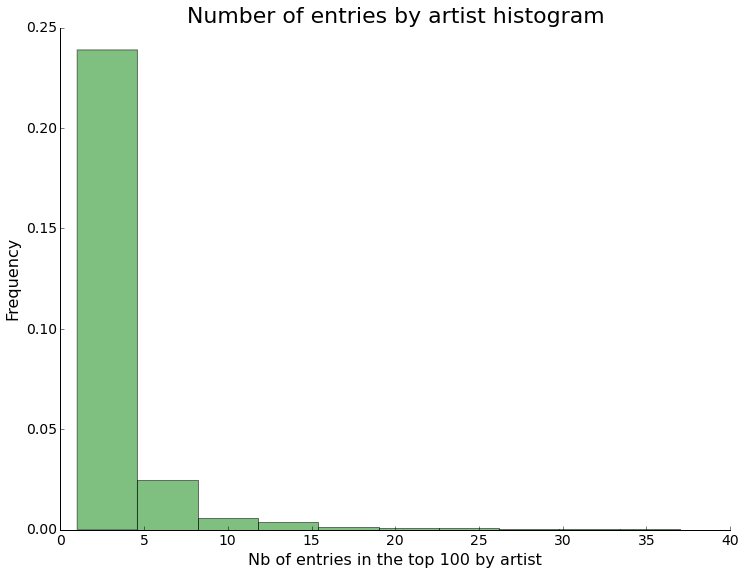

In [20]:
dsf.create_histogram_nb_entries(billboard_df_artist_count_with_additional_items["Counts"], 
                            "Nb of entries in the top 100 by artist", 
                            "Frequency", 
                            "Number of entries by artist histogram", 
                            "Images/histogram_entries_by_artist.png")

In [21]:
cumulative_count_df = dsf.create_cumulative_counts_df(billboard_df_artist_count_with_additional_items)

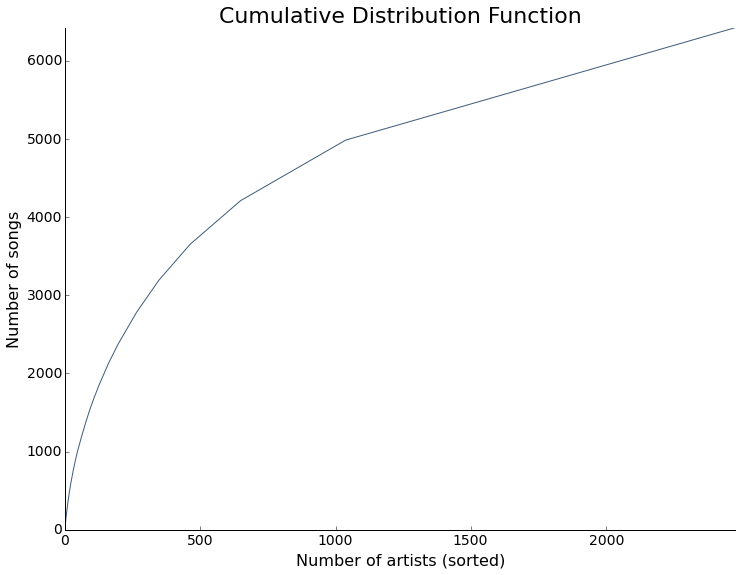

In [22]:
dsf.plot_cumulative_distribution_function(cumulative_count_df, 'Number of artists (sorted)',
                                         'Number of songs',
                                         'Cumulative Distribution Function',
                                         "Images/cdf_songs_x_artists.png")

In [23]:
cumulative_count_reverse_df = dsf.create_cumulative_counts_reverse_df(billboard_df_artist_count_with_additional_items)

In [93]:
#total_nb_songs = cumulative_count_reverse_df.tail(1)["Cumulative Count Reverse"].tolist()[0]
total_nb_songs = (end_year - start_year + 1) * 100
print "Total number of songs:", total_nb_songs

Total number of songs: 5600


In [94]:
total_nb_artists = cumulative_count_reverse_df.tail(1)["Cumulative Count Reverse"].index.tolist()[0]
print "Total number of artists:", total_nb_artists

Total number of artists: 2472


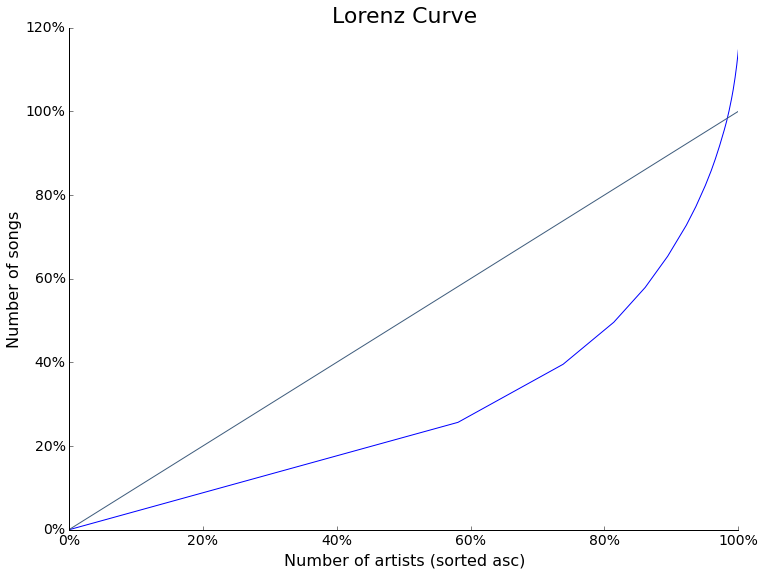

In [95]:
dsf.plot_lorenz_curve(cumulative_count_reverse_df, total_nb_songs, total_nb_artists,
                      "Number of artists (sorted asc)", 
                      "Number of songs", "Lorenz Curve",
                     "Images/lorenz_curve_full_dataset.png")

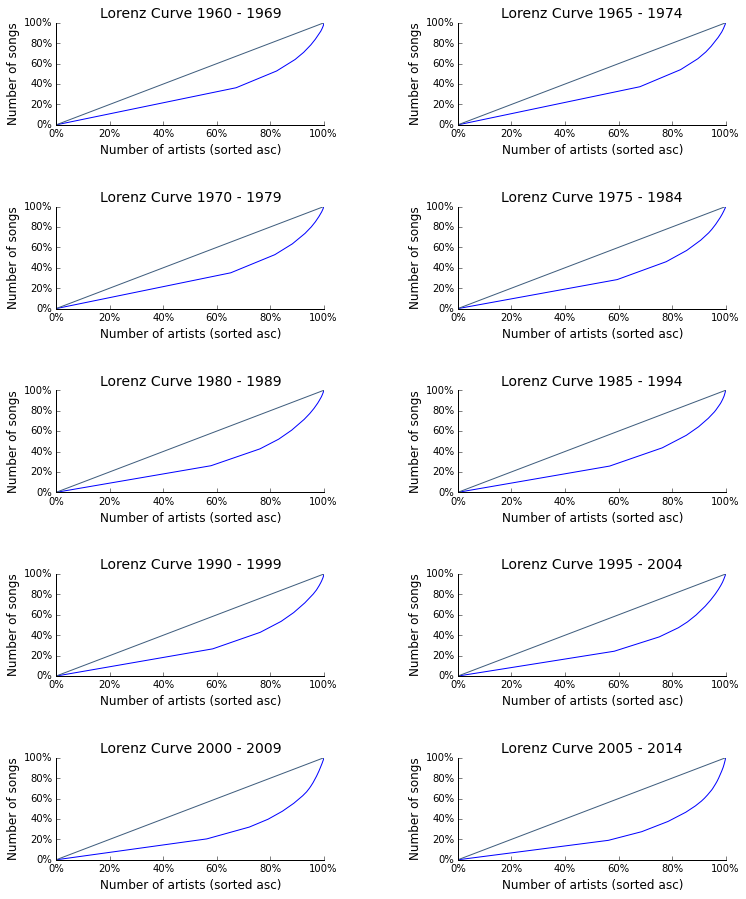

In [44]:
dsf.plot_multiple_lorenz_curves(unique_artist_df, start_year, end_year, 10, 5,
                                "Number of artists (sorted asc)",
                                "Number of songs", "Lorenz Curve",
                               "Images/lorenz_curves_multiple.png",
                               False)

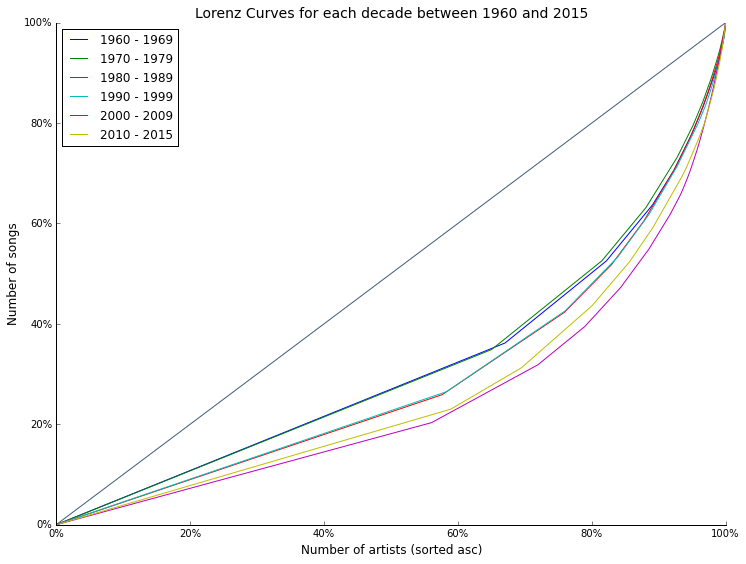

In [43]:
dsf.plot_multiple_lorenz_curves(unique_artist_df, start_year, end_year, 10, 10,
                                "Number of artists (sorted asc)",
                                "Number of songs", "Lorenz Curve",
                               "Images/lorenz_curves_multiple_subplot.png",
                               True)

In [198]:
billboard_df_artist_count_with_additional_items.head()

,Artist(s),Counts,Rank,List of songs,Years of presence,1960,1961,1962,1963,1964,...,2009,2010,2011,2012,2013,2014,2015,Image URL,familiarity,hotttnesss
1759,Rihanna,37,41.135135,"{""title"":""Pon de Replay"",""year"":""2005"",""rank"":...",11,0,0,0,0,0,...,3,4,6,6,3,2,2,http://img2-ak.lst.fm/i/u/361e7fee96af4f2fb72c...,0.849921,0.830018
1354,Mariah Carey,36,32.666667,"{""title"":""Vision of Love"",""year"":""1990"",""rank""...",18,0,0,0,0,0,...,1,0,0,0,1,0,0,http://img2-ak.lst.fm/i/u/61ca3abeab76743c4d6a...,0.823746,0.817989
1342,Madonna,36,48.555556,"{""title"":""Borderline"",""year"":""1984"",""rank"":""35...",18,0,0,0,0,0,...,0,0,0,0,0,0,0,http://img2-ak.lst.fm/i/u/b39ba21b6e184bfaaca0...,0.834375,0.780054
1259,Lil Wayne,33,52.484848,"{""title"":""Back That Azz Up"",""year"":""1999"",""ran...",12,0,0,0,0,0,...,4,4,6,1,1,2,2,http://img2-ak.lst.fm/i/u/d5df4736e4ea44588cc1...,0.87316,0.627773
2375,Usher,30,38.333333,"{""title"":""You Make Me Wanna..."",""year"":""1997"",...",13,0,0,0,0,0,...,0,4,3,3,0,1,1,http://img2-ak.lst.fm/i/u/1a08595ffd1f4fc9cfbc...,0.791469,0.705289


In [48]:
reload(dsf)

<module 'dataStoryFunctions' from 'dataStoryFunctions.py'>

In [55]:
### Gini coefficient ###

# The formula is the following:
#    G = (N+1) / (N-1) - (2 / (N * (N - 1) * u)) * Sum(Pi * Xi)(for i = 1 to n)

# Where G is the coefficient we’re after, N is the number of samples, u is the mean 
# of the values, and P and X are respectively the rank and the number of songs 
# of the ith artist, ranked such that the highest number of songs ranks 1,
# and the lowest ranks N; 
# this way, that the last term in the equation is a sum of the products of
# each number of songs by its rank

In [48]:
gini_global = dsf.calculate_gini_coefficient(unique_artist_df, start_year, end_year + 1)
gini_global

0.4884902842132417

In [81]:
gini_coefficient_df = dsf.calculte_gini_per_year(unique_artist_df, start_year, end_year, 3, 1)

In [82]:
gini_coefficient_df.tail()

,Year(s),Gini Coefficient
51,2011 - 2014,0.416318
52,2012 - 2015,0.409540
53,2013 - 2015,0.362046
54,2014 - 2015,0.318741
55,2015 - 2015,0.260979


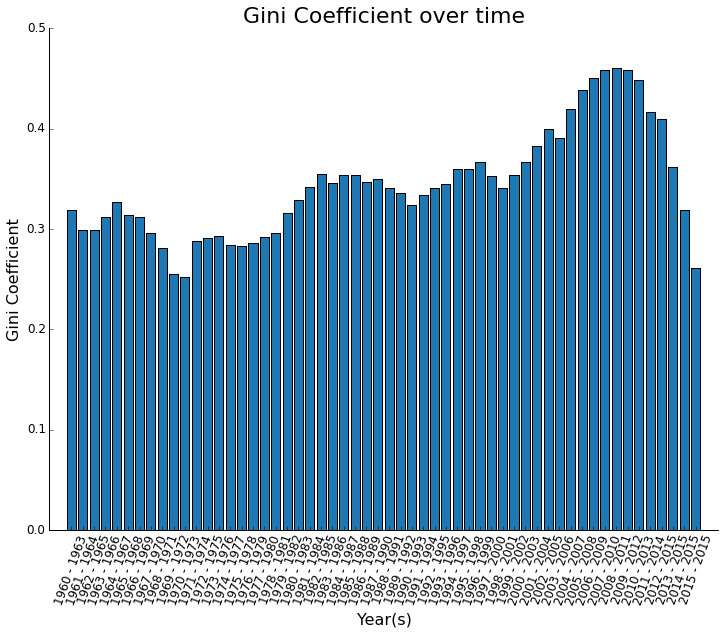

In [83]:
dsf.plot_gini_coefficient(gini_coefficient_df, "Year(s)",
                                "Gini Coefficient", "Gini Coefficient over time",
                               "Images/gini_coefficient_plot.png")

In [79]:
dsf.get_most_dominant_artist_per_years(unique_artist_df, start_year, end_year, 3, 1)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
2015


In [34]:
entries_count_by_artist = dsf.get_most_dominant_artist_per_years(unique_artist_df, start_year, end_year, 3, 1)

In [35]:
entries_count_by_artist

,Artist(s),Counts,Rank,List of songs,Years of presence,1960,1961,1962,1963,1964,...,Dominance 2006 - 2008,Dominance 2007 - 2009,Dominance 2008 - 2010,Dominance 2009 - 2011,Dominance 2010 - 2012,Dominance 2011 - 2013,Dominance 2012 - 2014,Dominance 2013 - 2015,Dominance 2014 - 2015,Dominance Max
1759,Rihanna,37,41.135135,"{""title"":""Pon de Replay"",""year"":""2005"",""rank"":...",11,0,0,0,0,0,...,0.016667,0.026667,0.026667,0.023333,0.033333,0.040000,0.030000,0.016667,0.006667,"{""value"":0.04,""years"":[""Dominance 2011 - 2013""]}"
1342,Madonna,36,48.555556,"{""title"":""Borderline"",""year"":""1984"",""rank"":""35...",18,0,0,0,0,0,...,0.003333,0.003333,0.003333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{""value"":0.0266666666667,""years"":[""Dominance 1..."
1354,Mariah Carey,34,33.647059,"{""title"":""Vision of Love"",""year"":""1990"",""rank""...",18,0,0,0,0,0,...,0.003333,0.003333,0.006667,0.003333,0.000000,0.000000,0.003333,0.003333,0.000000,"{""value"":0.0233333333333,""years"":[""Dominance 1..."
1259,Lil Wayne,33,52.484848,"{""title"":""Back That Azz Up"",""year"":""1999"",""ran...",12,0,0,0,0,0,...,0.010000,0.033333,0.040000,0.026667,0.033333,0.023333,0.006667,0.010000,0.006667,"{""value"":0.04,""years"":[""Dominance 2008 - 2010""]}"
2375,Usher,30,38.333333,"{""title"":""You Make Me Wanna..."",""year"":""1997"",...",13,0,0,0,0,0,...,0.003333,0.006667,0.003333,0.013333,0.023333,0.020000,0.010000,0.003333,0.003333,"{""value"":0.0233333333333,""years"":[""Dominance 2..."
677,Elton John,30,44.800000,"{""title"":""Rocket Man"",""year"":""1972"",""rank"":""40...",18,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{""value"":0.0233333333333,""years"":[""Dominance 1..."
1317,Ludacris,29,51.724138,"{""title"":""One Minute Man"",""year"":""2001"",""rank""...",10,0,0,0,0,0,...,0.016667,0.010000,0.003333,0.020000,0.020000,0.003333,0.000000,0.000000,0.000000,"{""value"":0.0333333333333,""years"":[""Dominance 2..."
409,Chris Brown,28,53.142857,"{""title"":""Run It!"",""year"":""2005"",""rank"":""42""},...",9,0,0,0,0,0,...,0.020000,0.023333,0.016667,0.003333,0.016667,0.026667,0.013333,0.010000,0.010000,"{""value"":0.0266666666667,""years"":[""Dominance 2..."
632,Drake,28,58.750000,"{""title"":""Best I Ever Had"",""year"":""2009"",""rank...",7,0,0,0,0,0,...,0.000000,0.000000,0.006667,0.023333,0.033333,0.026667,0.023333,0.023333,0.010000,"{""value"":0.0333333333333,""years"":[""Dominance 2..."
1703,R. Kelly,28,64.464286,"{""title"":""Bump n' Grind"",""year"":""1994"",""rank"":...",12,0,0,0,0,0,...,0.013333,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.003333,0.003333,"{""value"":0.0233333333333,""years"":[""Dominance 2..."


In [32]:
entries_count_by_artist = pd.concat([entries_count_by_artist, billboard_df_artist_count_with_additional_items['Image URL'], billboard_df_artist_count_with_additional_items['familiarity'], billboard_df_artist_count_with_additional_items['hotttnesss']], axis=1)

In [33]:
entries_count_by_artist

,Artist(s),Counts,Rank,List of songs,Years of presence,1960,1961,1962,1963,1964,...,Dominance 2009 - 2011,Dominance 2010 - 2012,Dominance 2011 - 2013,Dominance 2012 - 2014,Dominance 2013 - 2015,Dominance 2014 - 2015,Dominance Max,Image URL,familiarity,hotttnesss
1759,Rihanna,37,41.135135,"{""title"":""Pon de Replay"",""year"":""2005"",""rank"":...",11,0,0,0,0,0,...,0.023333,0.033333,0.040000,0.030000,0.016667,0.006667,"{""value"":0.04,""years"":[""Dominance 2011 - 2013""]}",http://img2-ak.lst.fm/i/u/361e7fee96af4f2fb72c...,0.849921,0.830018
1354,Mariah Carey,36,32.666667,"{""title"":""Vision of Love"",""year"":""1990"",""rank""...",18,0,0,0,0,0,...,0.003333,0.000000,0.000000,0.003333,0.003333,0.000000,"{""value"":0.0266666666667,""years"":[""Dominance 1...",http://img2-ak.lst.fm/i/u/61ca3abeab76743c4d6a...,0.823746,0.817989
1342,Madonna,36,48.555556,"{""title"":""Borderline"",""year"":""1984"",""rank"":""35...",18,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{""value"":0.0266666666667,""years"":[""Dominance 1...",http://img2-ak.lst.fm/i/u/b39ba21b6e184bfaaca0...,0.834375,0.780054
1259,Lil Wayne,33,52.484848,"{""title"":""Back That Azz Up"",""year"":""1999"",""ran...",12,0,0,0,0,0,...,0.026667,0.033333,0.023333,0.006667,0.010000,0.006667,"{""value"":0.04,""years"":[""Dominance 2008 - 2010""]}",http://img2-ak.lst.fm/i/u/d5df4736e4ea44588cc1...,0.873160,0.627773
2375,Usher,30,38.333333,"{""title"":""You Make Me Wanna..."",""year"":""1997"",...",13,0,0,0,0,0,...,0.013333,0.023333,0.020000,0.010000,0.003333,0.003333,"{""value"":0.0233333333333,""years"":[""Dominance 2...",http://img2-ak.lst.fm/i/u/1a08595ffd1f4fc9cfbc...,0.791469,0.705289
677,Elton John,30,44.800000,"{""title"":""Rocket Man"",""year"":""1972"",""rank"":""40...",18,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{""value"":0.0233333333333,""years"":[""Dominance 1...",http://img2-ak.lst.fm/i/u/6e9bdfb2663f4e78ae83...,0.826513,0.681196
1317,Ludacris,29,51.724138,"{""title"":""One Minute Man"",""year"":""2001"",""rank""...",10,0,0,0,0,0,...,0.020000,0.020000,0.003333,0.000000,0.000000,0.000000,"{""value"":0.0333333333333,""years"":[""Dominance 2...",http://img2-ak.lst.fm/i/u/38239a4576db4eab8914...,0.786717,0.621592
409,Chris Brown,28,53.142857,"{""title"":""Run It!"",""year"":""2005"",""rank"":""42""},...",9,0,0,0,0,0,...,0.003333,0.016667,0.026667,0.013333,0.010000,0.010000,"{""value"":0.0266666666667,""years"":[""Dominance 2...",http://img2-ak.lst.fm/i/u/b78f8741f33c4f28cf00...,0.830725,0.834893
632,Drake,28,58.750000,"{""title"":""Best I Ever Had"",""year"":""2009"",""rank...",7,0,0,0,0,0,...,0.023333,0.033333,0.026667,0.023333,0.023333,0.010000,"{""value"":0.0333333333333,""years"":[""Dominance 2...",http://img2-ak.lst.fm/i/u/d5e72a1e72334770c784...,0.865764,0.891742
1703,R. Kelly,28,64.464286,"{""title"":""Bump n' Grind"",""year"":""1994"",""rank"":...",12,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.003333,0.003333,"{""value"":0.0233333333333,""years"":[""Dominance 2...",http://img2-ak.lst.fm/i/u/b68b2f0fc9a34126a0d3...,0.773480,0.705470


In [34]:
entries_count_by_artist.to_csv('CSV_data/billboard_df_artist_count_with_additional_items_and_images.csv', sep=',')

In [61]:
geolocator = Nominatim()
location = geolocator.reverse("13.1667, -59.5333")

In [70]:
location.raw['address']['country']

u'Barbados'

In [33]:
artist = last_fm_network.get_artist("Rihanna")

In [34]:
import re
text = artist.get_bio_content(language="en")
re.match(r'(?:[^.:;]+[.:;]){3}', text).group()

u'Robyn Rihanna Fenty (born February 20, 1988), known by her stage name, Rihanna, is a Bajan singer.  Her song Umbrella was one of the highest-selling songs of 2007 and her 3rd album Good Girl Gone Bad was critically acclaimed, helping propel her to superstar status. She has attained thirteen Billboard Hot 100 number ones thus far and is the second Bajan artist to win a Grammy Award.'